# RFM Analysis Online Retail II

## Backgorund Context
Perusahaan memiliki data transaksi pelanggan yang sangat besar dan bervariasi, berisi informasi mengenai pembelian, nilai transaksi, serta perilaku belanja. Dalam persaingan bisnis yang ketat, perusahaan tidak bisa lagi mengandalkan strategi pemasaran yang generik (mass marketing). Dibutuhkan pendekatan berbasis data untuk menyegmentasikan pelanggan sehingga strategi customer relationship management (CRM) dapat lebih tepat sasaran.

# Stakeholder
Tim Marketing dan Customer Engagement membutuhkan segmentasi pelanggan untuk kampanye targeted marketing dan bertangung jawab mengatur strategi komunikasi dan retensi berdasarkan segmen pelanggan.

## Problem Statement
- Siapa pelanggan yang paling berharga (top spender).
- Siapa pelanggan yang sering bertransaksi.
- Siapa pelanggan yang sudah lama tidak berbelanja.

## Goal
- Mengukur berapa lama sejak pembelian terakhir
pelanggan.
- Mengukur berapa kali pelanggan bertransaksi.
- Mengukur berapa total uang yang dikeluarkan pelanggan.
- Membuat segmen pelanggan berdasarkan skor RFM.
- Memberikan insight untuk strategi marketing.

## Analytic Approach



Segmentasi pelanggan adalah proses membagi pelanggan ke dalam kelompok berdasarkan kesamaan karakteristik, perilaku, atau preferensi. Salah satu teknik yang umum digunakan adalah RFM Analysis, yaitu metode yang mengelompokkan pelanggan berdasarkan perilaku pembelian mereka di masa lalu.

RFM menganalisis tiga aspek utama:

- Recency (seberapa baru pelanggan terakhir bertransaksi),
- Frequency (seberapa sering pelanggan melakukan pembelian), dan
- Monetary (berapa banyak uang yang telah mereka belanjakan).
Dengan pendekatan ini, bisnis dapat memahami nilai dan kebiasaan pelanggan secara lebih mendalam.

Analysis akan dilakukan dengan langkah berikut:
1. Data Preparation
2. Hitung RFM Metrics
- Recency: (snapshot_date - LastPurchaseDate) per customer.
- Frequency: jumlah unique Invoice per customer.
- Monetary: jumlah total TotalAmount per customer.
- Scoring
3. Segmentation
Buat cluster manual berdasarkan kombinasi skor, misalnya:


## Data Colection

Pada tahap ini kita mengambil dataset langsung dari Kaggel.  
Tahap tahap yang dilakukan:  
1. Install library Kaggle
2. Dapatkan API Token Kaggle. Scroll ke bagian API → klik Create New API Token.
3. Upload API token ke Colab
4. Pindahkan ke folder yang benar
5. Download dataset
6. Ekstrak file zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from google.colab import files

In [ ]:
!pip install kaggle


In [ ]:
files.upload()  # lalu pilih file kaggle.json

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"diannainggolan","key":"5593907f84cdd0da46e584de05501d7b"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d kabilan45/online-retail-ii-dataset


Dataset URL: https://www.kaggle.com/datasets/kabilan45/online-retail-ii-dataset
License(s): unknown
online-retail-ii-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip online-retail-ii-dataset.zip


Archive:  online-retail-ii-dataset.zip
replace online_retail_II.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Data Understanding


Dataset terdiri dari 2 sheet:
- Year 2009-2010
- Year 2010-2011

Keduanya memiliki 8 kolom yang sama:

- Invoice: Nomor transaksi
- StockCode: Kode produk
- Description: Nama produk
- Quantity: Jumlah produk yang dibeli
- InvoiceDate: Tanggal & waktu transaksi
- Price: Harga per unit
- Customer ID: ID pelanggan
- Country: Negara pembeli

In [ ]:
# Baca dua sheet yang berbeda
df_2009 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df_2010 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')


In [ ]:
df = pd.concat([df_2009, df_2010], ignore_index=True)

In [ ]:
# Informsi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [ ]:
# Descriptive statistics
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [ ]:
# missing values
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [ ]:
len(df)

1067371

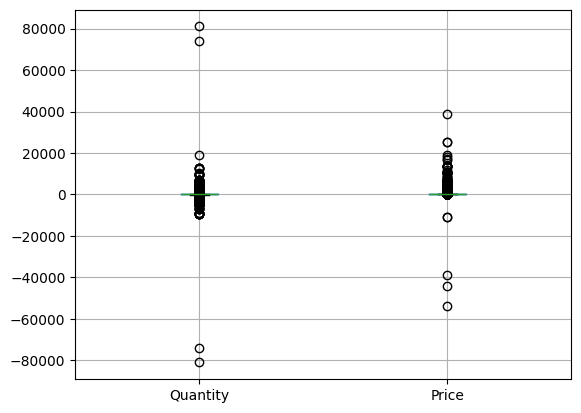

In [ ]:
# bentuk data sebelum di preprocessing
df[["Quantity", "Price"]].boxplot();

## Data Preprocessing

1. Hanya Mempertahankan Data dengan Customer ID untuk analisis RFM  
2. Ubah tipe data Customer ID menjadi string
3. Menangani Human Error: Price Negatif Diubah Menjadi Absolut
4. Filter data quantity dan price yang valid
5. Menambahkan Kolom TotalAmountt untuk keperluan nilai Monetary
6. Mengubah Kolom InvoiceDate ke Format Datetime

In [ ]:
df.dropna(subset=['Customer ID'], inplace=True)

In [ ]:
df['Customer ID'] = df['Customer ID'].astype(str)

In [ ]:
df['Price']=df['Price'].abs()

In [ ]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

In [ ]:
df['TotalAmount'] = df['Quantity'] * df['Price']


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
# Buat kolom TotalPrice = Quantity x Price
df['TotalPrice'] = df['Quantity'] * df['Price']

# Hitung total penjualan
total_penjualan = df['TotalPrice'].sum()

print(f"Total Penjualan: {total_penjualan:,.2f}")

Total Penjualan: 17,743,429.18


In [ ]:
# Buat kolom TotalSales
df['TotalSales'] = df['Quantity'] * df['Price']

# Misalnya kita asumsikan margin profit 20% (0.2)
df['Profit'] = df['TotalSales'] * 0.2

# Total profit
total_profit = df['Profit'].sum()
print(f"Total Profit (20% margin): {total_profit:,.2f}")


Total Profit (20% margin): 3,548,685.84


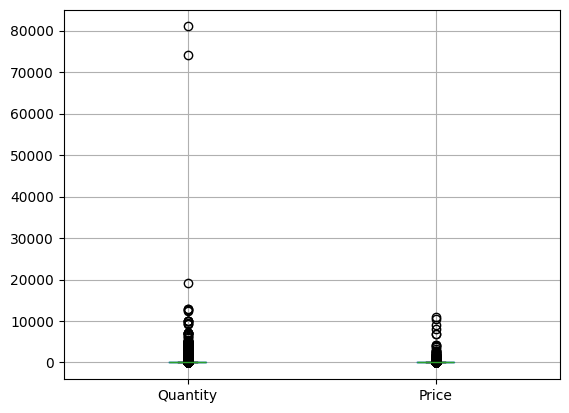

In [ ]:
# bentuk data setelah dipreprocessing
df[["Quantity", "Price"]].boxplot();

In [ ]:
df.to_csv('Processed_data.csv', index=False)

## RFM


### Recency (seberapa baru pelanggan terakhir bertransaksi),


In [ ]:
snapshot_date = df["InvoiceDate"].max() + dt.timedelta(days=1)
print("Snapshot date:", snapshot_date)

Snapshot date: 2011-12-10 12:50:00


In [ ]:
recency = df.groupby("Customer ID").agg({"InvoiceDate":"max"}).rename(columns={"InvoiceDate": "LastPurchase"})
recency

,LastPurchase
Customer ID,
12346.0,2011-01-18 10:01:00
12347.0,2011-12-07 15:52:00
12348.0,2011-09-25 13:13:00
12349.0,2011-11-21 09:51:00
12350.0,2011-02-02 16:01:00
...,...
18283.0,2011-12-06 12:02:00
18284.0,2010-10-04 11:33:00
18285.0,2010-02-17 10:24:00


In [ ]:
recency["Recency"] = (snapshot_date - recency["LastPurchase"]).dt.days
recency.head()


,LastPurchase,Recency
Customer ID,,
12346.0,2011-01-18 10:01:00,326
12347.0,2011-12-07 15:52:00,2
12348.0,2011-09-25 13:13:00,75
12349.0,2011-11-21 09:51:00,19
12350.0,2011-02-02 16:01:00,310


### Frequency (seberapa sering pelanggan melakukan pembelian)


In [ ]:
freq = df.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
freq

,Frequency
Customer ID,
12346.0,12
12347.0,8
12348.0,5
12349.0,4
12350.0,1
...,...
18283.0,22
18284.0,1
18285.0,1


### Monetary (berapa banyak uang yang telah mereka belanjakan)

In [ ]:
monetary = df.groupby("Customer ID").agg({"TotalAmount":"sum"}).rename(columns={"TotalAmount":"Monetary"})
monetary

,Monetary
Customer ID,
12346.0,77556.46
12347.0,5633.32
12348.0,2019.40
12349.0,4428.69
12350.0,334.40
...,...
18283.0,2736.65
18284.0,461.68
18285.0,427.00


In [ ]:
rfm = pd.concat([recency, freq, monetary], axis=1)
rfm = rfm.reset_index()
rfm

,Customer ID,LastPurchase,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,326,12,77556.46
1,12347.0,2011-12-07 15:52:00,2,8,5633.32
2,12348.0,2011-09-25 13:13:00,75,5,2019.40
3,12349.0,2011-11-21 09:51:00,19,4,4428.69
4,12350.0,2011-02-02 16:01:00,310,1,334.40
...,...,...,...,...,...
5873,18283.0,2011-12-06 12:02:00,4,22,2736.65
5874,18284.0,2010-10-04 11:33:00,432,1,461.68
5875,18285.0,2010-02-17 10:24:00,661,1,427.00
5876,18286.0,2010-08-20 11:57:00,477,2,1296.43


### Beri Skor RFM

In [ ]:
# Skor Recency (Semakin kecil nilainya, semakin tinggi skornya)
def r_score(recency):
    if recency <= 30:
        return 5
    elif recency <= 60:
        return 4
    elif recency <= 120:
        return 3
    elif recency <= 180:
        return 2
    else:
        return 1

# Skor Frequency (Semakin banyak order, semakin tinggi skornya)
def f_score(frequency):
    if frequency >= 14:
        return 5
    elif frequency >= 9:
        return 4
    elif frequency >= 4:
        return 3
    elif frequency >= 2:
        return 2
    else:
        return 1

# Skor Monetary (Semakin banyak belanja, semakin tinggi skornya)
def m_score(monetary):
    if monetary > 351:
        return 5
    elif monetary > 201:
        return 4
    elif monetary > 151:
        return 3
    elif monetary > 51:
        return 2
    else:
        return 1


In [ ]:
# Hitung skor RFM
rfm['R_score'] = rfm['Recency'].apply(r_score)
rfm['F_score'] = rfm['Frequency'].apply(f_score)
rfm['M_score'] = rfm['Monetary'].apply(m_score)

# Gabungkan F dan M menjadi satu untuk mewakili sumbu vertikal pada grafik
rfm['FM_score'] = ((rfm['F_score'] + rfm['M_score']) // 2).astype(int)

# Buat RFM_Score gabungan (opsional)
rfm['RFM_Score'] = rfm['R_score'].astype(str) + rfm['FM_score'].astype(str)


In [ ]:
rfm

,Customer ID,LastPurchase,Recency,Frequency,Monetary,R_score,F_score,M_score,FM_score,RFM_Score
0,12346.0,2011-01-18 10:01:00,326,12,77556.46,1,4,5,4,14
1,12347.0,2011-12-07 15:52:00,2,8,5633.32,5,3,5,4,54
2,12348.0,2011-09-25 13:13:00,75,5,2019.40,3,3,5,4,34
3,12349.0,2011-11-21 09:51:00,19,4,4428.69,5,3,5,4,54
4,12350.0,2011-02-02 16:01:00,310,1,334.40,1,1,4,2,12
...,...,...,...,...,...,...,...,...,...,...
5873,18283.0,2011-12-06 12:02:00,4,22,2736.65,5,5,5,5,55
5874,18284.0,2010-10-04 11:33:00,432,1,461.68,1,1,5,3,13
5875,18285.0,2010-02-17 10:24:00,661,1,427.00,1,1,5,3,13
5876,18286.0,2010-08-20 11:57:00,477,2,1296.43,1,2,5,3,13


In [ ]:
rfm.to_csv("RFM.csv", index=False)

In [ ]:
# Segmentasi berdasarkan R (x-axis) dan rata-rata F×M (y-axis)
segment_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2][5]': 'Can’t Lose Them',
    r'3[1-2]': 'About to Sleep',
    r'3[3-4]': 'Need Attention',
    r'[3-4][5]': 'Loyal',
    r'4[1-2]': 'Promising',
    r'[4-5][3-4]': 'Potential Loyalist',
    r'5[1-2]': 'New Customer',
    r'5[5]': 'Champion',
}

# Gabungkan Recency dan FM sebagai key
rfm['R_FM'] = rfm['R_score'].astype(str) + rfm['FM_score'].astype(str)
rfm['Segment'] = rfm['R_FM'].replace(segment_map, regex=True)


In [ ]:
rfm.to_csv("RFM_segment.csv", index=False)

### Summary Statistics

In [ ]:
rfmStats = rfm[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats.columns = rfmStats.columns.map('_'.join).str.strip('|')
rfmStats

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,82.362745,77.5,102,17.805767,1.088235,1.0,102,0.347635,186.040294,171.020,102,86.630591
At Risk,350.726244,367.0,1768,150.773763,3.331448,3.0,1768,2.338595,1332.235275,804.450,1768,2810.459835
Can’t Lose Them,251.675676,206.0,37,122.008892,26.243243,20.0,37,23.250335,12771.796514,7794.590,37,15444.526097
Champion,10.197619,8.0,420,8.398857,32.850000,23.0,420,35.676201,20284.164057,9164.395,420,49973.319061
Hibernating,459.885504,445.5,952,167.493712,1.070378,1.0,952,0.286912,179.415788,167.810,952,86.141759
Loyal,57.383178,51.0,107,22.511902,20.289720,17.0,107,10.071452,9621.671879,6775.710,107,12629.254819
Need Attention,84.034130,80.0,586,16.544027,4.882253,4.0,586,3.127183,2004.026846,1334.440,586,2287.813327
New Customer,16.981982,18.0,111,8.373098,1.180180,1.0,111,0.508084,191.168378,178.050,111,81.793723
Potential Loyalist,24.818447,22.0,1713,16.809796,5.717455,5.0,1713,3.394543,2315.796499,1426.190,1713,4691.235131


In [ ]:
import plotly.express as px
import pandas as pd

# 1. Hitung jumlah customer per segmen
segment_counts = rfm['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Customer Count']

segment_counts['Label'] = segment_counts['Segment'] + '<br>' + segment_counts['Customer Count'].astype(str) + ' customers'

# 3. Buat treemap dengan label custom
fig = px.treemap(
    segment_counts,
    path=['Label'],
    values='Customer Count',
    color='Segment',
    title='Treemap: Number of Customers'
)

fig.show()


### Visualisasi

# Kesimpulan dan Saran

### Kesimpulan

- At Risk adalah segmen dengan jumlah pelanggan terbanyak.
- Potential Loyalist menjadi segmen terbesar kedua
- Hibernating juga mencakup jumlah pelanggan yang cukup besar
- Segmen Champion, meskipun memiliki nilai pembelian tertinggi, hanya terdiri dari sebagian kecil pelanggan.
- Segmen seperti Need Attention, Promising, dan New Customer memiliki jumlah pelanggan yang lebih sedikit

## Saran

Saran dibagi berdasarkan skala yang dimiliki pelanggan
**Recency (1–5)**:

* **Recency 1** → Pelanggan sangat lama tidak transaksi.
  *Saran:* lakukan reaktivasi agresif (diskon besar, kampanye khusus).

* **Recency 2** → Lama tidak transaksi, tapi belum terlalu “dingin.”
  *Saran:* kirim reminder atau penawaran ringan untuk tarik kembali.

* **Recency 3** → Aktivitas sedang.
  *Saran:* beri dorongan kecil (voucher, promo terbatas) agar tetap aktif.

* **Recency 4** → Transaksi cukup baru.
  *Saran:* jaga engagement, berikan program loyalitas ringan.

* **Recency 5** → Transaksi sangat baru.
  *Saran:* pertahankan momentum dengan reward, upsell, atau eksklusivitas.

**Frequency (1–5)**:

* **Frequency 1** → Jarang sekali beli.
  *Saran:* buat kampanye ajakan beli ulang, misalnya promo pembelian kedua.

* **Frequency 2** → Sudah pernah beli beberapa kali.
  *Saran:* beri insentif kecil agar jadi lebih rutin.

* **Frequency 3** → Pembelian cukup rutin.
  *Saran:* dorong jadi pelanggan loyal dengan program poin atau member.

* **Frequency 4** → Sering beli.
  *Saran:* jaga kepuasan dan beri bonus kecil agar tidak turun aktivitasnya.

* **Frequency 5** → Sangat sering beli.
  *Saran:* beri penghargaan eksklusif, program VIP, atau akses early promo.

**Monetary (1–5)**:

* **Monetary 1** → Nilai belanja sangat kecil.
  *Saran:* tawarkan bundling atau promo minimum pembelian untuk naikkan nilai transaksi.

* **Monetary 2** → Nilai belanja masih rendah.
  *Saran:* beri insentif untuk upgrade pembelian (misalnya diskon jika belanja lebih banyak).

* **Monetary 3** → Nilai belanja sedang.
  *Saran:* dorong pembelian produk bernilai lebih tinggi dengan rekomendasi personal.

* **Monetary 4** → Nilai belanja tinggi.
  *Saran:* pertahankan dengan benefit eksklusif dan layanan premium ringan.

* **Monetary 5** → Nilai belanja sangat tinggi.
  *Saran:* perlakukan sebagai pelanggan prioritas, beri reward eksklusif agar tetap loyal.



Saran untuk tiap segmen:
* **Champion** → Pertahankan loyalitas dengan reward dan program eksklusif.
* **Loyal** → Jaga engagement dan beri insentif khusus.
* **Cannot Lose Them** → Reaktivasi cepat dengan penawaran premium.
* **At Risk** → Tarik kembali dengan promo terarah.
* **Need Attention** → Dorong pembelian ulang dan tingkatkan loyalitas.
* **Potential Loyalist** → Perkuat engagement agar naik kelas.
* **Promising** → Bangun kebiasaan beli dengan promo rutin.
* **New Customer** → Bangun hubungan awal dengan pengalaman positif.
* **About to Sleep** → Follow-up ringan untuk cegah dorman.
* **Hibernating** → Reaktivasi agresif atau segmentasi ulang.
